In [1]:
# Resolving dependencies if necessary ( uncomment)
#!python3 -m pip install pandas
#!python3 -m pip install pandas_datareader
#!python3 -m pip install seaborn
#!python3 -m pip install pyarrow

In [2]:
import numpy as np
import pandas as pd
#import pandas_datareader.data as web
import matplotlib.pyplot as plt
from matplotlib import style
%matplotlib inline
import seaborn as sns
import datetime as dt
import getpass
from alpha_vantage.timeseries import TimeSeries
from alpha_vantage.techindicators import TechIndicators
from alpha_vantage.sectorperformance import SectorPerformances
from alpha_vantage.foreignexchange import ForeignExchange
import save_df

style.use('ggplot')
# Yahoo
# df = web.DataReader('tsla', 'yahoo', start, end)

In [3]:
# Variables
portfolio = ['BBDC4','PETR3','ABEV3','B3SA3','BBDC3','BBDC4','BBSE3','VALE3','VIVT4','VVAR3','WEGE3','GOAU4','PCAR4',
            'BRAP4','BRDT3','BRFS3','BRKM5','BRML3','BTOW3','CCRO3','CIEL3','CMIG4','CSAN3','CVCB3','CYRE3','BBAS3',
            'ECOR3','EGIE3','ELET3','ELET6','EMBR3','ENBR3','EQTL3','ESTC3','FLRY2','GGBR4','GOLL4','HYPE3','IGTA3',
            'ITSA4','ITUB4','JBSS3','KLBN11','KROT3','LAME4','LOGG3','LREN3','MGLU3','MRFG3','MRVE3','MULT3','NATU3',
            'PETR4','QUAL3','RADL3','RAIL3','RENT3','SANB11','SBSP3','SMLS3','SUZB3','TAEE11','TIMP3','UGPR3','USUM5']

In [5]:
# Inputs
# S2E91EXZLVNF5310 - RQOMM1ANI19U4JN9
alpha_vantage_api_key = getpass.getpass("Add your Alpha Vantage API key (Link: https://www.alphavantage.co/): ")
stock = input("Select your stock (PETR4): ") or 'PETR4'
sulfix = input("Sulfix(SAO): ") or 'SAO'

Add your Alpha Vantage API key (Link: https://www.alphavantage.co/): ········
Select your stock (PETR4): 
Sulfix(SAO): 


In [6]:
# Timeseries data for a given stock
timeseries_data_obj = TimeSeries(key = alpha_vantage_api_key, output_format = 'pandas' )

In [7]:
stock_metadata = timeseries_data_obj.get_symbol_search(stock)
stock_metadata[0]

,1. symbol,2. name,3. type,4. region,5. marketOpen,6. marketClose,7. timezone,8. currency,9. matchScore
date,,,,,,,,,
1970-01-01,PETR4.SAO,Petroleo Brasileiro S.A. - Petrobras,Equity,Brazil/Sao Paolo,10:00,17:30,UTC-03,BRL,0.7692


In [8]:
data, meta_data = timeseries_data_obj.get_intraday(symbol=f"{stock}.{sulfix}", interval  = '1min', outputsize = 'full')

In [9]:
print(f"Period:  {min(data.index)} - {max(data.index)} ")
print(f"Range: {max(data.index) - min(data.index)}")
print(f"Lines: {data.shape[0]}")

Period:  2020-06-29 09:08:00 - 2020-07-03 15:54:00 
Range: 4 days 06:46:00
Lines: 2008


In [10]:
meta_data

{'1. Information': 'Intraday (1min) open, high, low, close prices and volume',
 '2. Symbol': 'PETR4.SAO',
 '3. Last Refreshed': '2020-07-03 15:54:00',
 '4. Interval': '1min',
 '5. Output Size': 'Full size',
 '6. Time Zone': 'US/Eastern'}

In [11]:
data.columns = ['open', 'high', 'low', 'close', 'volume']
data.head(1)

,open,high,low,close,volume
date,,,,,
2020-06-29 09:08:00,21.1,21.1,21.0,21.04,0.0


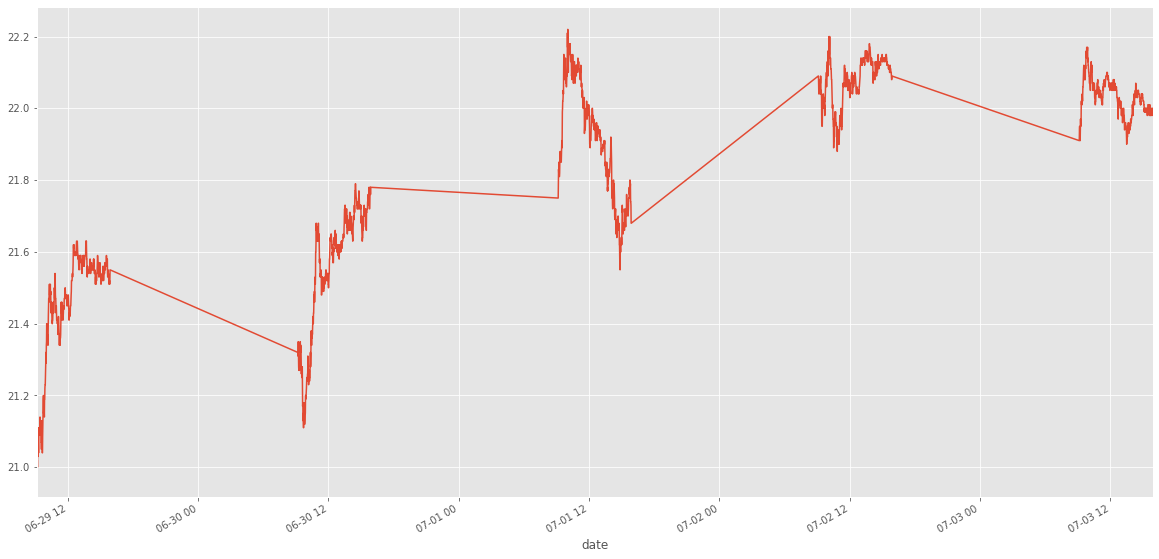

In [12]:
plt.figure(figsize=(20,10))
data['close'].plot()

In [13]:
# Technical indicator for a given stock
tech_indicator = TechIndicators(key=alpha_vantage_api_key, output_format='pandas')
tech_data, tech_meta_data = tech_indicator.get_bbands(symbol=f"{stock}.{sulfix}", interval='1min', time_period=60)

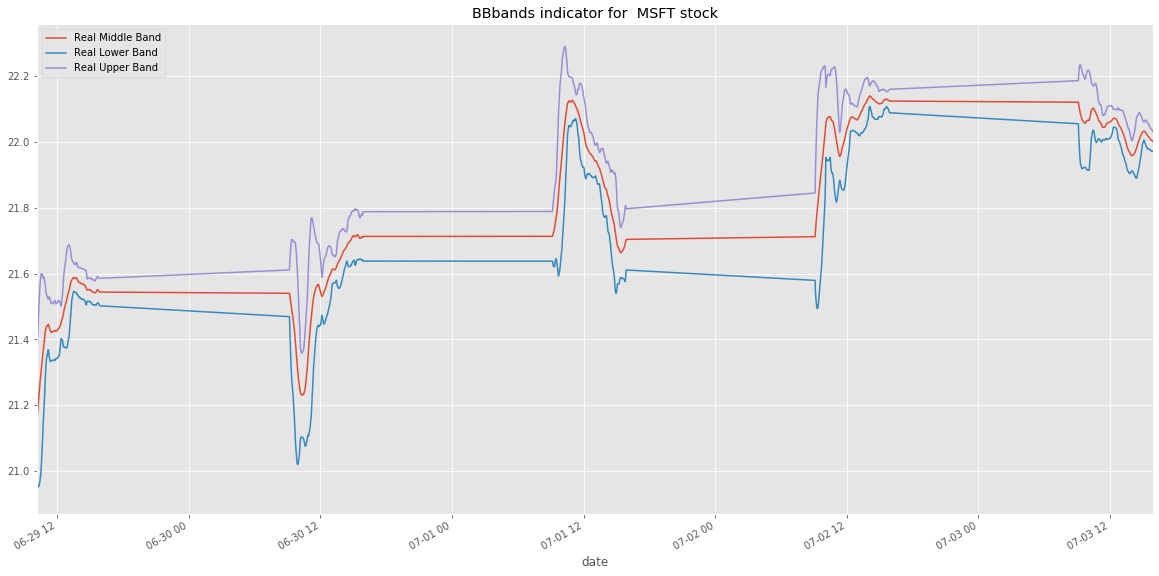

In [14]:
tech_data.plot(figsize=(20,10), title='BBbands indicator for  MSFT stock')

In [15]:
# Sector Performance
sector_performance = SectorPerformances(key=alpha_vantage_api_key, output_format='pandas')
sector_data, sector_meta_data = sector_performance.get_sector()

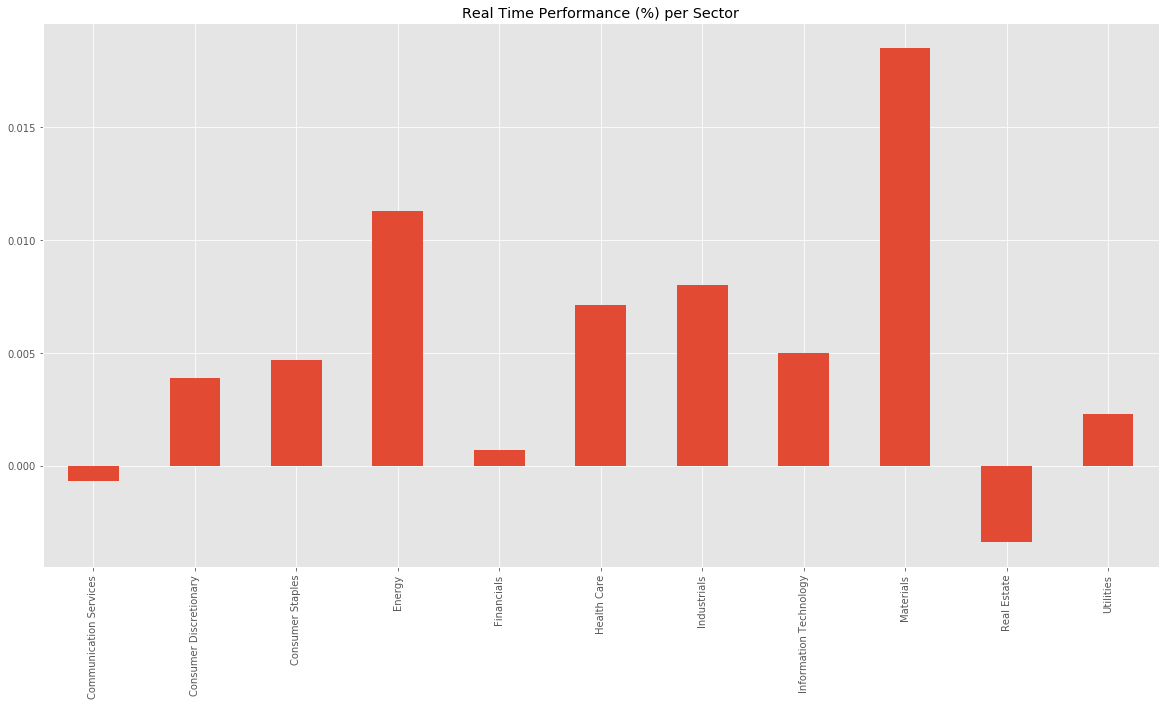

In [16]:
sector_data['Rank A: Real-Time Performance'].plot(kind='bar', figsize=(20,10), title='Real Time Performance (%) per Sector')

In [17]:
# Foreign Exchange
currency = ForeignExchange(key=alpha_vantage_api_key)
currency_data, currency_meta_data = currency.get_currency_exchange_rate(from_currency='BRL',to_currency='USD')

In [18]:
print(currency_data)

{'1. From_Currency Code': 'BRL', '2. From_Currency Name': 'Brazilian Real', '3. To_Currency Code': 'USD', '4. To_Currency Name': 'United States Dollar', '5. Exchange Rate': '0.18817154', '6. Last Refreshed': '2020-07-04 01:11:28', '7. Time Zone': 'UTC', '8. Bid Price': '0.18810076', '9. Ask Price': '0.18817154'}


In [26]:
save_df.df2file(data, stock)